In [2]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [3]:
dir = 'C:/Users/rsh15/Desktop/seunghuni/dataset/porto_seguro/'
train = pd.read_csv(dir+'train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
# Taking a look at how many rows and columns the train dataset contains.
rows = train.shape[0]
columns = train.shape[1]
print('The train dataset contains {0} rows and {1} columns'.format(rows,columns))

The train dataset contains 595212 rows and 59 columns


# Data Quality Checks

## Null or missing values check

In [5]:
# any() applied twice to check run the isnull check across all columns.
train.isnull().any().any()

False

In [6]:
# null values check returns false.
# but values of -1 indicate that the feature was missing from the observation.
train_copy = train
train_copy = train_copy.replace(-1,np.NaN)

<AxesSubplot:>

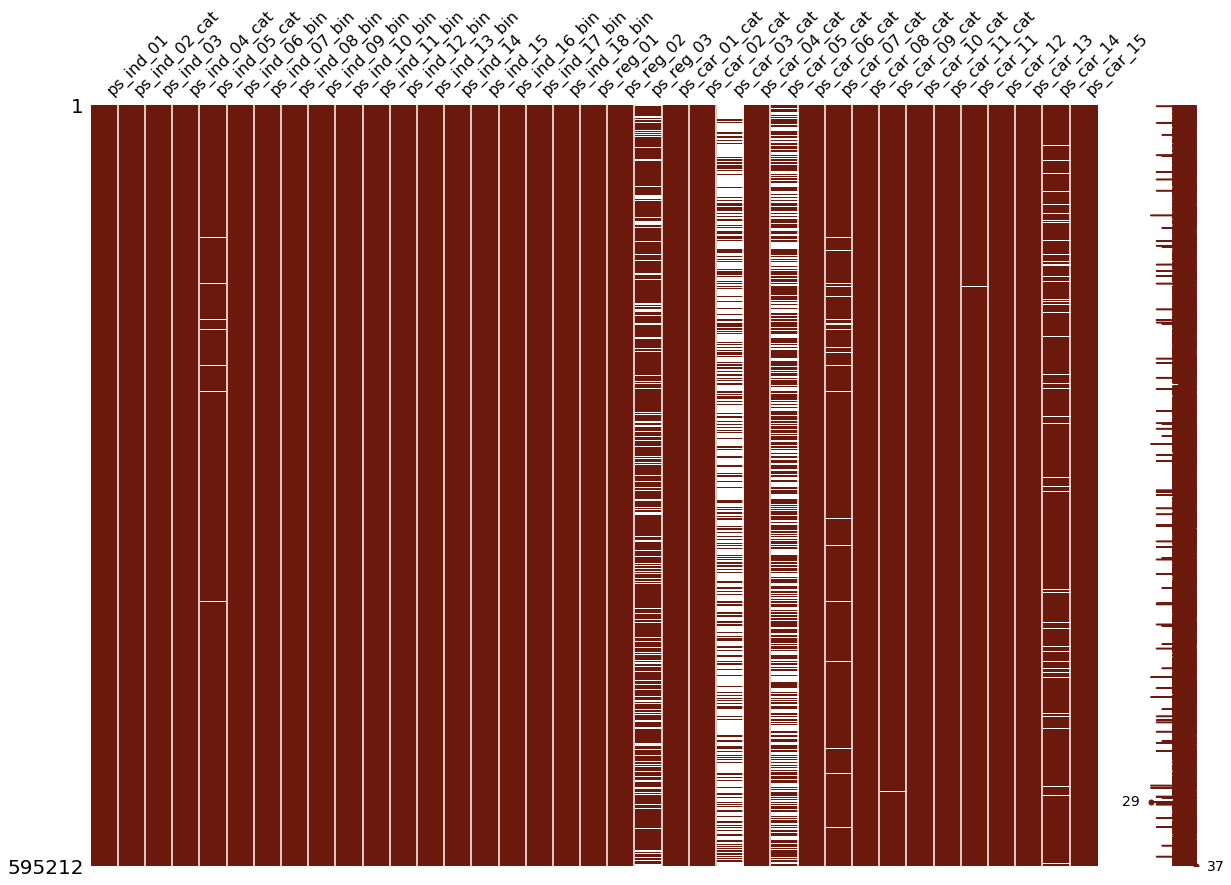

In [7]:
# use missingno to visualize missing values in the dataset
import missingno as msno

# nullity or missing values by columns.
msno.matrix(df=train_copy.iloc[:,2:39],figsize=(20,14),color=(0.42,0.1,0.05))

In [8]:
# we can observe 7 features out of 59 total features that actually contained null values.
# ps_ind_05_cat|ps_reg_03|ps_car_03_cat|ps_car_05_cat|ps_car_07_cat|ps_car_09_car|ps_car_14

## Target variable inspection

In [9]:
data = [go.Bar(
            x = train['target'].value_counts().index.values,
            y = train['target'].value_counts().values,
            text = 'Distribution of target variable')]

layout = go.Layout(title='Target variable distribution')

fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='basic-bar')

## Data type check

In [10]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [11]:
train_float = train.select_dtypes(include=['float64'])
train_int   = train.select_dtypes(include=['int64'])

## Correlation Plots

### correlation of float features

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

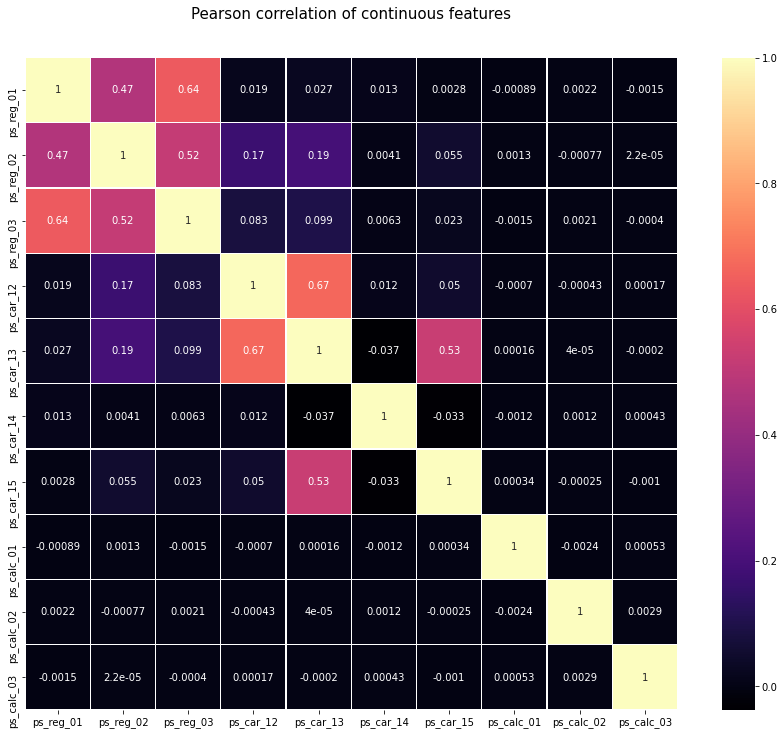

In [12]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features',y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
            linecolor='white',annot=True)

In [13]:
# from the correlation plot we can see majority of features display zero or no correlation to one another.
# paired features display a positive linear correlation
# (ps_reg_01,ps_reg_03), (ps_reg_02,ps_reg_03), (ps_car_12,ps_car_13), (ps_car_13,ps_car_15)

### correlation of integer features

In [14]:
data = [
    go.Heatmap(
        z = train_int.corr().values,
        x = train_int.columns.values,
        y = train_int.columns.values,
        colorscale='Viridis',
        reversescale=False,
        opacity=1.0)
]

layout = go.Layout(
    title = 'Pearson Correlation of integer-type features',
    xaxis = dict(ticks='',nticks=36),
    yaxis = dict(ticks=''),
    width = 900,height = 700)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='labelled-heatmap')

In [15]:
# similarly, we can observe that there are huge number of columns that are not linearly correlated with each other at all.
# evident from the fact that we observe a lot of 0 value cells in our correlation plot.
# this is quite a usefil observation to us, especially if we are trying to perform dimensionality reduction transformations
# such as PCA, this would require a certain degree of correlation.
# negatively correlated : ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin

## mutual information plots

In [ ]:
# mutual_info_class : 타겟변수에 대한 상호정보.
# _class는 이산형 타겟변수, _regression은 연속형 타겟변수에 대한 상호정보 추정.

In [16]:
mf = mutual_info_classif(train_float.values,train.target.values,n_neighbors=3,random_state=17)
mf

array([0.01402035, 0.00431986, 0.0055185 , 0.00778454, 0.00157233,
       0.00197537, 0.01226   , 0.00553038, 0.00545101, 0.00562139])

## Binary Features Inspection

In [18]:
# another inspect of data that we may want to inspect would be the columns that only contain binary values,
# ie. where values take on only either of the two values 1 or 0.
# proceeding, we store all columns that contain binary values and then generate a vertical plotly barplot of these
# binary values as follows

In [23]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col] == 0).sum())
    one_list.append((train[col] == 1).sum())

In [25]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list,
    name='Zero Count')

trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One Count')

data = [trace1,trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables')

fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='stacked-bar')

In [ ]:
# here we observe that 4 features : ps_ind_10_bin, p